Text(0.5, 1.0, '$f_\\star = \\tanh\\left(\\rm{He}_1(z_1) + \\rm{He}_3(z_2)\\right)$')

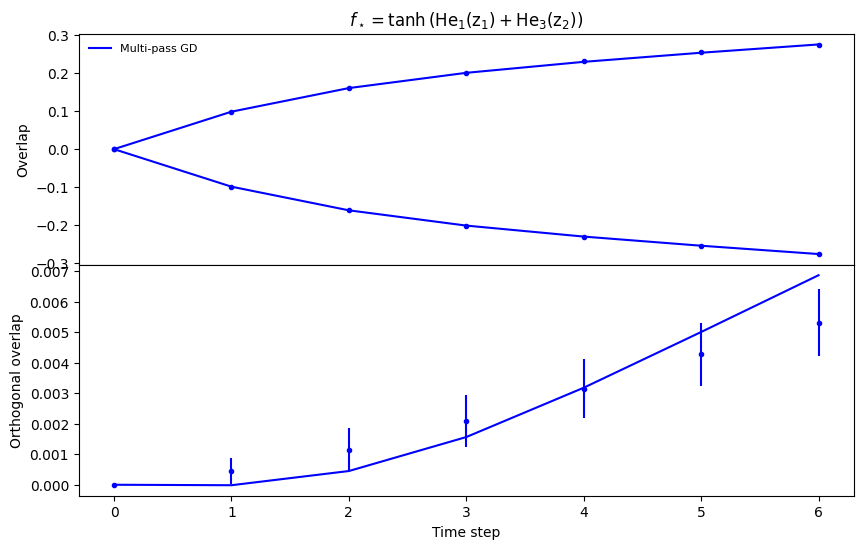

In [9]:
import numpy as np

alpha = 3
D = 5000
T_sim = 7
T_DMFT = 7
m_0 = 0.0
lambd = .0
lr = .2
p = 2
k = 2

online = False

symmetry_string = "TEST"

dmft_samples = int(1e7)


# Load simulation data
file_sim = np.load(f'data/simulations_A{alpha}_p{p}_k{k}_D{D}_T{T_sim}_sym={"offline_learn"}_lambda{lambd}_lr{lr}_online{online}.npz')
file_DMFT = np.load(f'data/DMFT_A{alpha}_T{T_DMFT}_P{p}_sym={symmetry_string}_lambda{lambd}_lr{lr}_samples{dmft_samples}.npz')


direction = np.array([0.767832, -0.640651])
direction_perp = np.array([0.640651, 0.767832])
T_lim = min(T_DMFT, T_sim)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
colors = ['blue', 'red', 'green', 'orange']

for p in range(p):
    mag_proj_DMFT = np.einsum("tk,k->t",file_DMFT["m"][:,p,:], direction)
    mag_proj_sim = np.einsum("tks,k->ts",file_sim["magnetisation_list"].transpose(1,2,3,0)[:,p,:,:], direction)
    
    ax[0].errorbar(np.arange(T_lim), mag_proj_sim.mean(axis=1)[:T_lim], mag_proj_sim.std(axis=1)[:T_lim]/np.sqrt(mag_proj_sim.shape[1]), marker='o', linestyle=" ", markersize=3, color=colors[0])
    if p == 0:
        ax[0].plot(np.arange(T_lim), mag_proj_DMFT[:T_lim], marker=' ', label="Multi-pass GD", color=colors[0])
    else:
        ax[0].plot(np.arange(T_lim), mag_proj_DMFT[:T_lim], marker=' ', color=colors[0])  

for p in range(p):
    mag_proj_DMFT = np.einsum("tk,k->t",file_DMFT["m"][:,p,:], direction_perp)
    mag_proj_sim = np.einsum("tks,k->ts",file_sim["magnetisation_list"].transpose(1,2,3,0)[:,p,:,:], direction_perp)
    
    ax[1].errorbar(np.arange(T_lim), mag_proj_sim.mean(axis=1)[:T_lim], mag_proj_sim.std(axis=1)[:T_lim]/np.sqrt(mag_proj_sim.shape[1]), marker='o', linestyle=" ", markersize=3, color=colors[0])
    if p == 0:
        ax[1].plot(np.arange(T_lim), mag_proj_DMFT[:T_lim], marker=' ', label="Multi-pass GD", color=colors[0])
    else:
        ax[1].plot(np.arange(T_lim), mag_proj_DMFT[:T_lim], marker=' ', color=colors[0])



plt.subplots_adjust(wspace=.2, hspace=0)

ax[0].set_xticks(np.arange(T_lim))

ax[0].set_ylabel(r"Overlap")
ax[1].set_ylabel(r"Orthogonal overlap")
ax[1].set_xlabel("Time step")

ax[0].legend(fontsize=8, frameon=False)

ax[0].set_title(r"$f_\star = \tanh\left(\rm{He}_1(z_1) + \rm{He}_3(z_2)\right)$")


